# Classifying the genres of films based on their plots

In [1]:
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

Our aim in this project is to classify movies genres based on their plots using NLP techniques

In [2]:
import pandas as pd
df=pd.read_csv('./movie_plots.csv')

After importing the Kaggle dataset, our initial step was to explore it by examining its shape, identifying null values, checking for duplicates, and determining the unique values of movie genres.

In [3]:
df.shape

(34886, 8)

In [4]:
print(f'duplicate rows: {df.duplicated().sum()}')
print(df.isnull().sum())

duplicate rows: 0
Release Year           0
Title                  0
Origin/Ethnicity       0
Director               0
Cast                1422
Genre                  0
Wiki Page              0
Plot                   0
dtype: int64


In [5]:
df['Genre'].nunique() 

2265

A quick glance at the dataframe's first few rows revealed that there were movies with an unknown genre so we decided to drop them from the dataset

In [6]:
print(df.columns)
df.head()

Index(['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre', 'Wiki Page', 'Plot'],
      dtype='object')


,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [7]:
unknowns=df[df['Genre'] == 'unknown']
print(unknowns.shape[0])

6083


In [8]:
df = df[df['Genre'] != 'unknown']
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
6,1903,The Great Train Robbery,American,Edwin S. Porter,NaN,western,https://en.wikipedia.org/wiki/The_Great_Train_...,The film opens with two bandits breaking into ...
7,1904,The Suburbanite,American,Wallace McCutcheon,NaN,comedy,https://en.wikipedia.org/wiki/The_Suburbanite,The film is about a family who move to the sub...
10,1906,Dream of a Rarebit Fiend,American,Wallace McCutcheon and Edwin S. Porter,NaN,short,https://en.wikipedia.org/wiki/Dream_of_a_Rareb...,The Rarebit Fiend gorges on Welsh rarebit at a...
11,1906,From Leadville to Aspen: A Hold-Up in the Rockies,American,Francis J. Marion and Wallace McCutcheon,NaN,short action/crime western,https://en.wikipedia.org/wiki/From_Leadville_t...,The film features a train traveling through th...
12,1906,Kathleen Mavourneen,American,Edwin S. Porter,NaN,short film,https://en.wikipedia.org/wiki/Kathleen_Mavourn...,Irish villager Kathleen is a tenant of Captain...


Our first step was to work on the genre column. We noticed that some genres were combined (like 'Sport/Action'), and others had minor spelling variations ('biographic' and 'biography'). 

In [9]:
def group_genres(dataset):
    x=list(dataset) 
    for i in range(len(x)): 
        current_word=x[i] 
        for j in range(1,len(x)):
            new_word=current_word 
            if new_word in x[j]: 
                x[j]=new_word              

    return x 
new_genres=group_genres(df['Genre']) 

In [10]:
y=[]
for i in range(len(new_genres)):
    if new_genres[i] not in y:
        y.append(new_genres[i]) 
print(y)

['western', 'comedy', 'short', 'biographic', 'drama', 'adventure', 'sport', 'horror', 'crime', 'fantasy', 'epic', 'historic', 'biography', 'mystery', 'romance', 'exploitation', 'spy', 'propaganda', 'biopic', 'animated', 'swashbuckler', 'documentary', 'war', 'thriller', ' ', 'race', 'music', 'operetta', 'detective', 'action', 'romantic', 'animation', 'serial', 'suspense', 'gangster', 'biblical', '-', 'family', 'art', 'aviation', 'experimental', 'nature', 'educational', 'slapstick', 'espionage', 'p.o.w.', 'disaster', 'adult', 'travel', 'slasher', 'compilation', 'biker', 'anthology', 'mockumentary', 'blaxploitation', 'ero', 'teen', 'parody', 'imax', 'children', 'shakespearean', 'independent', 'satire', 'reality', 'dramedy', 'dance', 'concert', 'spoof', 'social', 'survival', 'slahser', 'christian', 'anime', 'imdb', 'counterculture', 'period', 'sf', 'tragedy', 'wuxia', 'history', 'sword', 'bruceploitation', 'duology', 'triad', 'mythology', 'devotional', 'costume', 'religious', 'political', 

To simplify matters, we created a function that grouped similar genres together, reducing the overall number of categories.

In [11]:
for i in range(len(new_genres)):
    if new_genres[i]=='biographic' or new_genres[i]=='biopic': 
        new_genres[i]='biography'
    if new_genres[i]=='comedey' or new_genres[i]=='dramedy' or new_genres[i]=='slapstick' or new_genres[i]=='parody' or new_genres[i]=='spoof' or new_genres[i]=='mocumentary' or new_genres[i]=='satire': 
        new_genres[i]='comedy'
    if new_genres[i]=='ero' or new_genres[i]=='race' or new_genres[i]=='biker' or new_genres[i]=='swashbuckler' : 
        new_genres[i]='action'
    if new_genres[i]=='animation' : 
        new_genres[i]='animated'
    if new_genres[i]== 'love':
        new_genres[i]='romance'
    if new_genres[i]=='christian' or new_genres[i]=='devotional' or new_genres[i]=='biblical' : 
        new_genres[i]='religious'
    if new_genres[i]=='cowboy': 
        new_genres[i]='western'
    if new_genres[i]=='politics': 
        new_genres[i]='political'
    if new_genres[i]=='operetta': 
        new_genres[i]='music'
    if new_genres[i]=='spy' or new_genres[i]=='detective' or new_genres[i]=='espionage' : 
        new_genres[i]='investigative'
    if new_genres[i]=='mythological': 
        new_genres[i]='mythology'
    if new_genres[i]== "war" or new_genres[i]=='p.o.w.' :
        new_genres[i]='war'
    if new_genres[i]=='gangster' or new_genres[i]=='heist' or new_genres[i]=='mob' :
        new_genres[i]='crime'
    if new_genres[i]== "horror" or new_genres[i]=='slahser'or new_genres[i]=='slasher' :
        new_genres[i]='horror'
    if new_genres[i] == 'documentary' or new_genres[i]=='mockumentary':
        new_genres[i]='documentary'
    if new_genres[i] == 'historical' or new_genres[i]=='period' or new_genres[i]=='historic':
        new_genres[i]='history'
    if new_genres[i]=='youth' or new_genres[i]=='teen': 
        new_genres[i]='youth'
    if new_genres[i]=='bruceploitation' or new_genres[i]=='blaxploitation': 
        new_genres[i]='exploitation'

We fixed grammatical errors ('ero' that stands for 'hero', 'slahser instead of 'slasher') 

In [12]:
y=[]
for i in range(len(new_genres)):
    if new_genres[i] not in y:
        y.append(new_genres[i])
print(y)

['western', 'comedy', 'short', 'biography', 'drama', 'adventure', 'sport', 'horror', 'crime', 'fantasy', 'epic', 'history', 'mystery', 'romance', 'exploitation', 'investigative', 'propaganda', 'animated', 'action', 'documentary', 'war', 'thriller', ' ', 'music', 'romantic', 'serial', 'suspense', 'religious', '-', 'family', 'art', 'aviation', 'experimental', 'nature', 'educational', 'disaster', 'adult', 'travel', 'compilation', 'anthology', 'youth', 'imax', 'children', 'shakespearean', 'independent', 'reality', 'dance', 'concert', 'social', 'survival', 'anime', 'imdb', 'counterculture', 'sf', 'tragedy', 'wuxia', 'sword', 'duology', 'triad', 'mythology', 'costume', 'political', 'masala', 'patriotic', '[140]', '[144]', 'supernatural', 'folklore', 'remake', 'fiction', 'stylish', 'patriotism', 'kaiju', 'jidaigeki', 'samurai', 'keiji', 'chambara', 'pink', 'tokusatsu', 'chanbara', 'yakuza', 'mocatsu', 'splatter']


In [13]:
for i in range(len(df)):
    df['Genre'].iloc[i]=new_genres[i]

In [14]:
df = df[df['Genre'] != '-']
df = df[df['Genre'] != '[140]']
df = df[df['Genre'] != '[144]']
df = df[df['Genre'] != ' ']
df = df[df['Genre'] != 'imax']
df = df[df['Genre'] != 'imdb']

We removed genres that are meaningless

In [15]:
df['Genre'].nunique() 

77

We reduced the numbers of genres to 77 and visualized it using a barplot

In [16]:
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
6,1903,The Great Train Robbery,American,Edwin S. Porter,NaN,western,https://en.wikipedia.org/wiki/The_Great_Train_...,The film opens with two bandits breaking into ...
7,1904,The Suburbanite,American,Wallace McCutcheon,NaN,comedy,https://en.wikipedia.org/wiki/The_Suburbanite,The film is about a family who move to the sub...
10,1906,Dream of a Rarebit Fiend,American,Wallace McCutcheon and Edwin S. Porter,NaN,short,https://en.wikipedia.org/wiki/Dream_of_a_Rareb...,The Rarebit Fiend gorges on Welsh rarebit at a...
11,1906,From Leadville to Aspen: A Hold-Up in the Rockies,American,Francis J. Marion and Wallace McCutcheon,NaN,western,https://en.wikipedia.org/wiki/From_Leadville_t...,The film features a train traveling through th...
12,1906,Kathleen Mavourneen,American,Edwin S. Porter,NaN,short,https://en.wikipedia.org/wiki/Kathleen_Mavourn...,Irish villager Kathleen is a tenant of Captain...


Number of different genres:  77
Length of the dataset 27532
Genre
drama             8637
comedy            7282
horror            1395
action            1349
thriller          1290
                  ... 
triad                1
duology              1
survival             1
counterculture       1
splatter             1
Name: count, Length: 77, dtype: int64


Text(0.5, 1.0, 'Number of Plots per Genre')

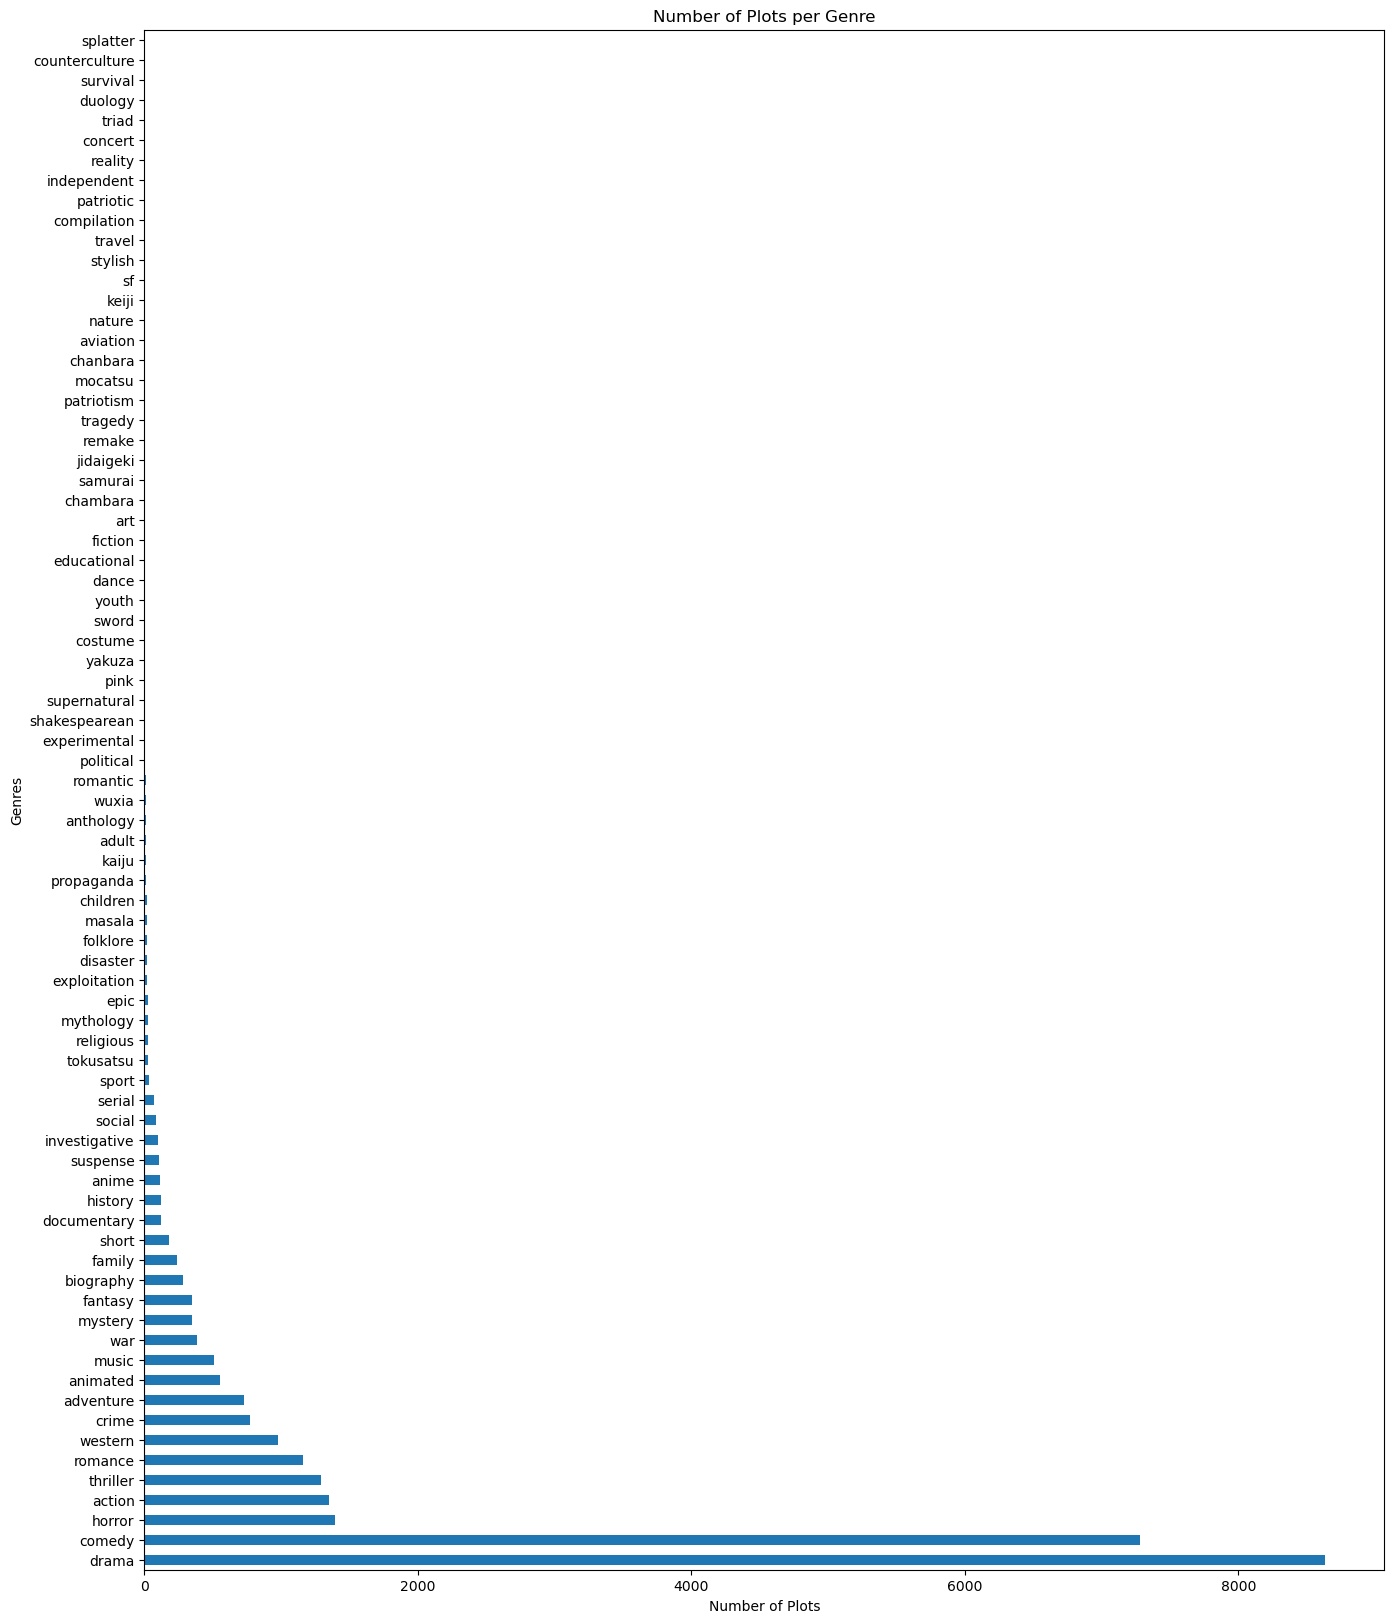

In [17]:
import matplotlib.pyplot as plt
print('Number of different genres: ',df['Genre'].nunique())
print('Length of the dataset', len(df))

vc = df['Genre'].value_counts()
print(vc)

plt.figure(figsize=(16,20))
df['Genre'].value_counts().plot(kind = 'barh')
plt.xlabel('Number of Plots')
plt.ylabel('Genres')
plt.title('Number of Plots per Genre')

 We decided to consider only genres with more than 100 observations, since a model would struggle to classify and represent categories with very few instances.

In [18]:
df=df[df.Genre.isin(vc.index[vc.gt(100)])]
print('Number of different genres: ',df['Genre'].nunique())
print('Length of the dataset: ', len(df))

Number of different genres:  22
Length of the dataset:  26997


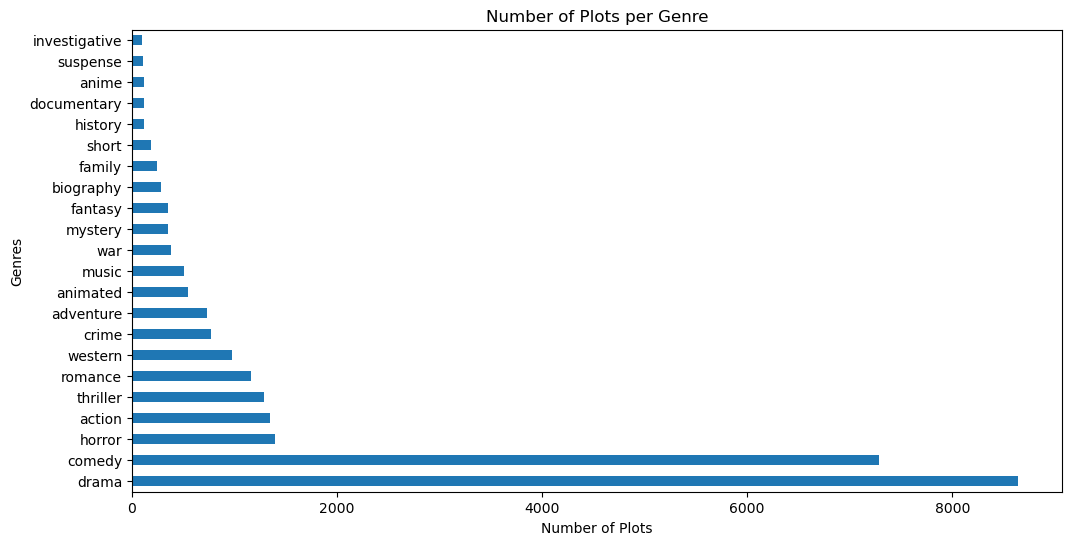

In [19]:
plt.figure(figsize = (12,6))
df['Genre'].value_counts().plot(kind = 'barh')
plt.xlabel('Number of Plots')
plt.ylabel('Genres')
plt.title('Number of Plots per Genre')
plt.show()

Comedy and Drama categories are over-represented, hence the dataset is unbalanced. 

We decided to rebalance the dataset considering 1500 films for both comedies and dramas

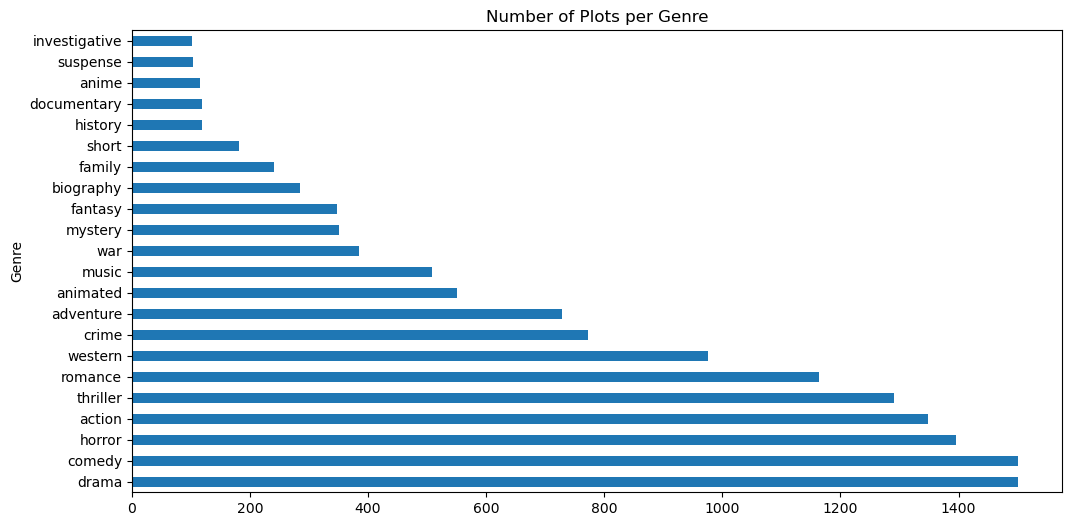

In [20]:
from sklearn.utils import resample

comedies = df[df['Genre'] == 'comedy'] #df with only comedy movies
sample_com = resample(comedies, replace = False, n_samples = 1500, random_state= 123) 
#take 2000 random observation from comedies

dramas = df[df['Genre'] == 'drama'] #df with only drama movies
sample_drama = resample(dramas, replace = False, n_samples= 1500, random_state= 123)  
#take 2000 random observation from comedies

df = df[df['Genre'] != 'comedy'] #remove comedy and drama from the original dataframe
df = df[df['Genre'] != 'drama']

df = pd.concat([df, sample_com, sample_drama]) 
#add comedy and drama rebalanced to the original df

plt.figure(figsize = (12,6))
plt.xlabel('Number of Plots')
plt.ylabel('Genres')
plt.title('Number of Plots per Genre')
df['Genre'].value_counts().plot(kind = 'barh') #show classes distribution
plt.show()

We finally got to 22 genres and almost 14078 observations.

In [21]:
print(df['Genre'].nunique())
len(df)

22


14078

Now that we have adjusted the genres, we can start working on the plots of the dataset. 

Here's an example below 

In [22]:
df['Plot'][6]

"The film opens with two bandits breaking into a railroad telegraph office, where they force the operator at gunpoint to have a train stopped and to transmit orders for the engineer to fill the locomotive's tender at the station's water tank. They then knock the operator out and tie him up. As the train stops it is boarded by the bandits\u200d—\u200cnow four. Two bandits enter an express car, kill a messenger and open a box of valuables with dynamite; the others kill the fireman and force the engineer to halt the train and disconnect the locomotive. The bandits then force the passengers off the train and rifle them for their belongings. One passenger tries to escape but is instantly shot down. Carrying their loot, the bandits escape in the locomotive, later stopping in a valley where their horses had been left.\r\nMeanwhile, back in the telegraph office, the bound operator awakens, but he collapses again. His daughter arrives bringing him his meal and cuts him free, and restores him to

# Data Pre-Processing

Given the lengthy and complex nature of the plot, we decided to remove stopwords and special characters, focusing on the most essential words

In [23]:
import re
df['Plot'] = df['Plot'].apply(lambda x: x.lower()) #set to lower case
df['Plot'] = df['Plot'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x))) #remove special characters (!nbs, !charac,!s)
df['Plot'] = df['Plot'].apply(lambda x: re.sub('[ \t\n\r\f\v]', ' ', x)) #remove white space characters (space, tab, new line..)

In [24]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

df = df.reset_index(drop=True)
def clean_text(text):
    text = ' '.join(word for word in text.split() if word not in stopwords)
    return text
df['Plot'] = df['Plot'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chels\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We removed stopwords using nltk

In [25]:
df['Plot'][0]

'film opens two bandits breaking railroad telegraph office force operator gunpoint train stopped transmit orders engineer fill locomotives tender stations water tank knock operator tie train stops boarded banditsnow four two bandits enter express car kill messenger open box valuables dynamite others kill fireman force engineer halt train disconnect locomotive bandits force passengers train rifle belongings one passenger tries escape instantly shot carrying loot bandits escape locomotive later stopping valley horses left meanwhile back telegraph office bound operator awakens collapses daughter arrives bringing meal cuts free restores consciousness dousing water comic relief dance hall eastern stranger forced dance locals fire feet door suddenly opens telegraph operator rushes tell robbery men quickly form posse overtakes bandits final shootout kills recovers stolen mail'

# Latent Dirichlet Allocation

We started by employing a method known as LDA (Latent Dirichlet Allocation) for topic modeling. This approach allows to efficiently analyze large volumes of text by clustering documents into topics. In particular it is a method for unsupervised classification of documents, similar to clustering on numeric data, working by identifying common themes or topics within the text based on the words used, allowing it to group similar documents together.


**Implementation**

We decide to use Gensim, which is an open-source library for topic modeling.

Here, we import the necessary libraries:

In [26]:
import numpy as np

#Gensim
import gensim
import gensim.corpora as corpora

#spacy
import spacy

#vis
import pyLDAvis
import pyLDAvis.gensim_models

We removed from the dataframe the variables we're not interested in for our task. 

In [27]:
df_lda = df.drop(['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast', 'Wiki Page'], axis = 1)
df_lda.head()

,Genre,Plot
0,western,film opens two bandits breaking railroad teleg...
1,short,rarebit fiend gorges welsh rarebit restaurant ...
2,western,film features train traveling rockies hold cre...
3,short,irish villager kathleen tenant captain clearfi...
4,biography,boones daughter befriends indian maiden boone ...


We use **lemmatization** to  simplify the representation of a word by reducing it to its base form.

We opted for lemmatization over stemming since it takes into account the part of speech of the word and its context in the sentence, while stemming does not.

In [28]:
def lemmatization(plots, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    plots_out = []
    for Plot in plots:
        doc = nlp(Plot)
        new_Plot = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_Plot.append(token.lemma_)
        final = " ".join(new_Plot)
        plots_out.append(final)
    return (plots_out)


lemmatized_plots = lemmatization(df_lda['Plot'])
print (lemmatized_plots[0][0:1000])

df_lda['Clean_Plot'] = lemmatized_plots

film open bandit break railroad telegraph office force operator gunpoint train stop transmit order engineer fill locomotive tender station water tank knock operator tie train stop board bandit enter express car kill messenger valuable dynamite other kill fireman train locomotive bandit force passenger train rifle belonging passenger try escape instantly shoot carry loot bandit escape locomotive later stop valley horse leave meanwhile back telegraph office bind operator awaken collapse daughter arrive bring meal cut free restore consciousness douse water comic relief dance force dance local fire foot door suddenly open telegraph operator rush tell robbery man quickly form posse overtake final recover steal mail


In [29]:
df_lda['Clean_Plot'][0]

'film open bandit break railroad telegraph office force operator gunpoint train stop transmit order engineer fill locomotive tender station water tank knock operator tie train stop board bandit enter express car kill messenger valuable dynamite other kill fireman train locomotive bandit force passenger train rifle belonging passenger try escape instantly shoot carry loot bandit escape locomotive later stop valley horse leave meanwhile back telegraph office bind operator awaken collapse daughter arrive bring meal cut free restore consciousness douse water comic relief dance force dance local fire foot door suddenly open telegraph operator rush tell robbery man quickly form posse overtake final recover steal mail'

Now we can convert text to individual words  by Tokenization

In [30]:
from nltk.tokenize import word_tokenize
def ind_words(plots):
    final = []
    for Plot in plots:
        new = word_tokenize(Plot)
        final.append(new)
    return (final)

data_words = ind_words(df_lda['Clean_Plot'])

print (data_words[0][0:1000])

['film', 'open', 'bandit', 'break', 'railroad', 'telegraph', 'office', 'force', 'operator', 'gunpoint', 'train', 'stop', 'transmit', 'order', 'engineer', 'fill', 'locomotive', 'tender', 'station', 'water', 'tank', 'knock', 'operator', 'tie', 'train', 'stop', 'board', 'bandit', 'enter', 'express', 'car', 'kill', 'messenger', 'valuable', 'dynamite', 'other', 'kill', 'fireman', 'train', 'locomotive', 'bandit', 'force', 'passenger', 'train', 'rifle', 'belonging', 'passenger', 'try', 'escape', 'instantly', 'shoot', 'carry', 'loot', 'bandit', 'escape', 'locomotive', 'later', 'stop', 'valley', 'horse', 'leave', 'meanwhile', 'back', 'telegraph', 'office', 'bind', 'operator', 'awaken', 'collapse', 'daughter', 'arrive', 'bring', 'meal', 'cut', 'free', 'restore', 'consciousness', 'douse', 'water', 'comic', 'relief', 'dance', 'force', 'dance', 'local', 'fire', 'foot', 'door', 'suddenly', 'open', 'telegraph', 'operator', 'rush', 'tell', 'robbery', 'man', 'quickly', 'form', 'posse', 'overtake', 'fin

### Bigrams and Trigrams

We then introduced bigrams and trigrams, which are pairs and triplets of adjacent words, to our model to improve its ability to recognize how words interact in text, unveiling valuable patterns and relationships within the language.

In [31]:
bigram_phrases = gensim.models.Phrases(data_words, min_count = 5,threshold=50) #It's a way to filter out less meaningful pairs considering Pointwise mutual information.) 
# min_count specify the number of times words have to appear together to be considered bigrams
trigram_phrases = gensim.models.Phrases(bigram_phrases[data_words], threshold = 50)

bigram = gensim.models.phrases.Phraser(bigram_phrases)  #Phrasers are used to apply the detected bigrams and trigrams to your text data.
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(plots):
    return(bigram[doc] for doc in plots)
def make_trigrams(plots):
    return(trigram[bigram[doc]] for doc in plots)

data_bigrams = list(make_bigrams(data_words))
data_bigrams_trigrams = list(make_trigrams(data_bigrams))

In [32]:
print (data_bigrams_trigrams[23])

['hard', 'working', 'miner', 'play', 'become', 'rich', 'year', 'prospect', 'take', 'fortune', 'leave', 'visit', 'ill', 'mother', 'play', 'ridge', 'however', 'detain', 'seductive', 'dance_hall', 'girl', 'name', 'trixie', 'play', 'also', 'know', 'firefly', 'trixie', 'cheat', 'gold', 'also', 'conceal', 'message', 'wire', 'die', 'mother', 'learn', 'next_day', 'mother', 'dead', 'denton', 'infuriate', 'cheat', 'betray', 'trixie', 'pretend', 'good', 'false', 'friend', 'rage', 'kill', 'play', 'mayall', 'kidnap', 'drag', 'hair', 'head', 'take', 'desert', 'enslave', 'desert', 'turn', 'back', 'white', 'civilization', 'hate', 'white', 'man', 'woman', 'assume', 'bandit', 'year', 'later', 'farmer', 'lose', 'die', 'desert', 'appeal', 'denton', 'help', 'refuse', 'assist', 'secretly', 'visit', 'night', 'play', 'love', 'innocent', 'virtuous', 'young', 'woman', 'migrant', 'bravely', 'confront', 'plead', 'cause', 'express', 'belief', 'white', 'man', 'refuse', 'protect', 'woman', 'distress', 'deeply', 'mov

As we can see 'dance_hall' and 'next_day'.

### TF-IDF


TF-IDF, which stands for Term Frequency - Inverse Document Frequency, is a statistical method that assesses the significance of words in documents by considering both how often a word appears in a document and how unique it is across a collection of documents to quantify the relevance of a term to a document or a collection of documents.

In [33]:
from gensim.models import TfidfModel

#The first step is to create a dictionary that maps words in the corpus to unique integer ids, using the Dictionary class 
#from gensim.
id2word = corpora.Dictionary(data_bigrams_trigrams)  #List of words 

plots = data_bigrams_trigrams

# doc2bow converts a collection of words to its bag-of-words representation: a list of (word_id, word_frequency) 2-tuples.
corpus = [id2word.doc2bow(Plot) for Plot in plots] 
print (corpus[0][0:1000])



[(0, 1), (1, 1), (2, 1), (3, 4), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 3), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 3), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2), (49, 2), (50, 4), (51, 1), (52, 1), (53, 1), (54, 2), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 3), (67, 1), (68, 1), (69, 3), (70, 1), (71, 1), (72, 1), (73, 4), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2)]


In [36]:
#We calculated the tfidf of each word in the corpus
tfidf = TfidfModel(corpus, id2word=id2word)

low_value = 0.025 #to drop low value words 
# if a word occur with this frequency in all the corpus, then it occurs so frequently
# that it doesn't lend value to the clustering algorithm

low_value_words=[]

#We removed all the words with low value and defined a new corpus without them
words_missing_in_tfidf=[]
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = []
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops = low_value_words+words_missing_in_tfidf
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids]
    
    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow

**Implementation of the LDA model**

In [37]:
from gensim.models.ldamulticore import LdaMulticore
lda_model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=22,
                                           random_state=100,
                                           chunksize=100, # number of documents to be used in each training chunk
                                           passes=100,
                                           workers = 5)                                            

**Visualisation**

In [38]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.255865  0.359907       1        1  14.346241
9      0.342353  0.233656       2        1  12.353807
14    -0.017340  0.373292       3        1  11.214189
19     0.131445  0.401511       4        1  11.101284
15     0.314557  0.040809       5        1   7.642776
17     0.162616  0.124924       6        1   6.606770
7      0.030999  0.200633       7        1   4.736311
2     -0.128382  0.107203       8        1   4.612640
21    -0.287795  0.283652       9        1   4.451332
18     0.426895  0.010610      10        1   4.324650
12     0.379317 -0.193645      11        1   4.154808
3     -0.211897  0.390441      12        1   3.772037
6     -0.405023 -0.017212      13        1   1.948410
10    -0.385958  0.093211      14        1   1.657926
8      0.263401 -0.345099      15        1   1.376211
4     -0.385330 -0.181750      16        1   1.166149
16    -0.209597 -0.401573      17        1   1.010947
11    -0.268004 -0.243794      18        1   0.881883
20    -0.017960 -0.190632      19        1   0.769870
0      0.108524 -0.319966      20        1   0.764609
5      0.006084 -0.424203      21        1   0.667544
13    -0.104769 -0.301976      22        1   0.439606, topic_info=          Term          Freq         Total Category  logprob  loglift
36        kill  12299.000000  12299.000000  Default  30.0000  30.0000
44         man   7646.000000   7646.000000  Default  29.0000  29.0000
304       find   6803.000000   6803.000000  Default  28.0000  28.0000
99         get   6899.000000   6899.000000  Default  27.0000  27.0000
227     murder   4137.000000   4137.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
3308    minion     56.435434     96.456290  Topic22  -4.8772   4.8911
712       whip     66.302928    148.360843  Topic22  -4.7160   4.6216
3257  necklace     66.996079    163.055121  Topic22  -4.7056   4.5376
2893    donald     36.236195     47.428140  Topic22  -5.3202   5.1579
5195     bunny     34.211512     60.088935  Topic22  -5.3777   4.8638

[1250 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
8466     13  0.978780  accept_proposal
480       1  0.268734         accident
480       2  0.106688         accident
480       4  0.624026         accident
1314      5  0.982466            actor
...     ...       ...              ...
2429     10  0.461579           yellow
2429     21  0.531989           yellow
440       1  0.324654            young
440       4  0.674707            young
6676     20  0.996723           zombie

[2389 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 10, 15, 20, 16, 18, 8, 3, 22, 19, 13, 4, 7, 11, 9, 5, 17, 12, 21, 1, 6, 14])

In [39]:
test_doc = corpus[0]
vec = lda_model[test_doc]
print (vec)

sum = 0
for i in range(len(vec)):
    sum += vec[i][1]

print(sum)


[(3, 0.046103843), (6, 0.019289576), (7, 0.17552353), (8, 0.020561498), (9, 0.17763028), (10, 0.024562865), (12, 0.24630591), (14, 0.04588753), (15, 0.015271892), (17, 0.16709557), (18, 0.042439323), (19, 0.014638935)]
0.9953107554465532


The following code returns a list of (topic_id, topic_probability) tuples, where `topic_id` is the id of the topic and `topic_probability` is the probability that the topic represents a part of the document.

In [40]:
def Sort(sub_list):
    sub_list.sort(key = lambda x: x[1])
    sub_list.reverse()
    return (sub_list)

new_topics = lda_model[corpus]

y = []
for topic in new_topics:
    Sort(topic)
    y.append(topic)

We can now assign a predicted topic to each movie in the dataset. 

In [41]:
topics = []
for i in y:
    topics.append(i[0][0])
df_lda['Topics'] = topics
df_lda.sample(5)

,Genre,Plot,Clean_Plot,Topics
11000,war,film begins protagonist former conscript ivan ...,film begin protagonist former conscript interv...,17
4994,war,september 1971 clear us losing vietnam war opi...,clear lose average american soldier come age p...,17
10085,thriller,gang kidnapped girl several police officers in...,gang kidnap girl several police officer includ...,19
3378,thriller,cross burt lancaster experienced retiring cent...,cross experience retire central intelligence a...,14
3900,romance,darryl palmer baseball player atlanta braves e...,darryl palmer baseball player brave enjoy fame...,1


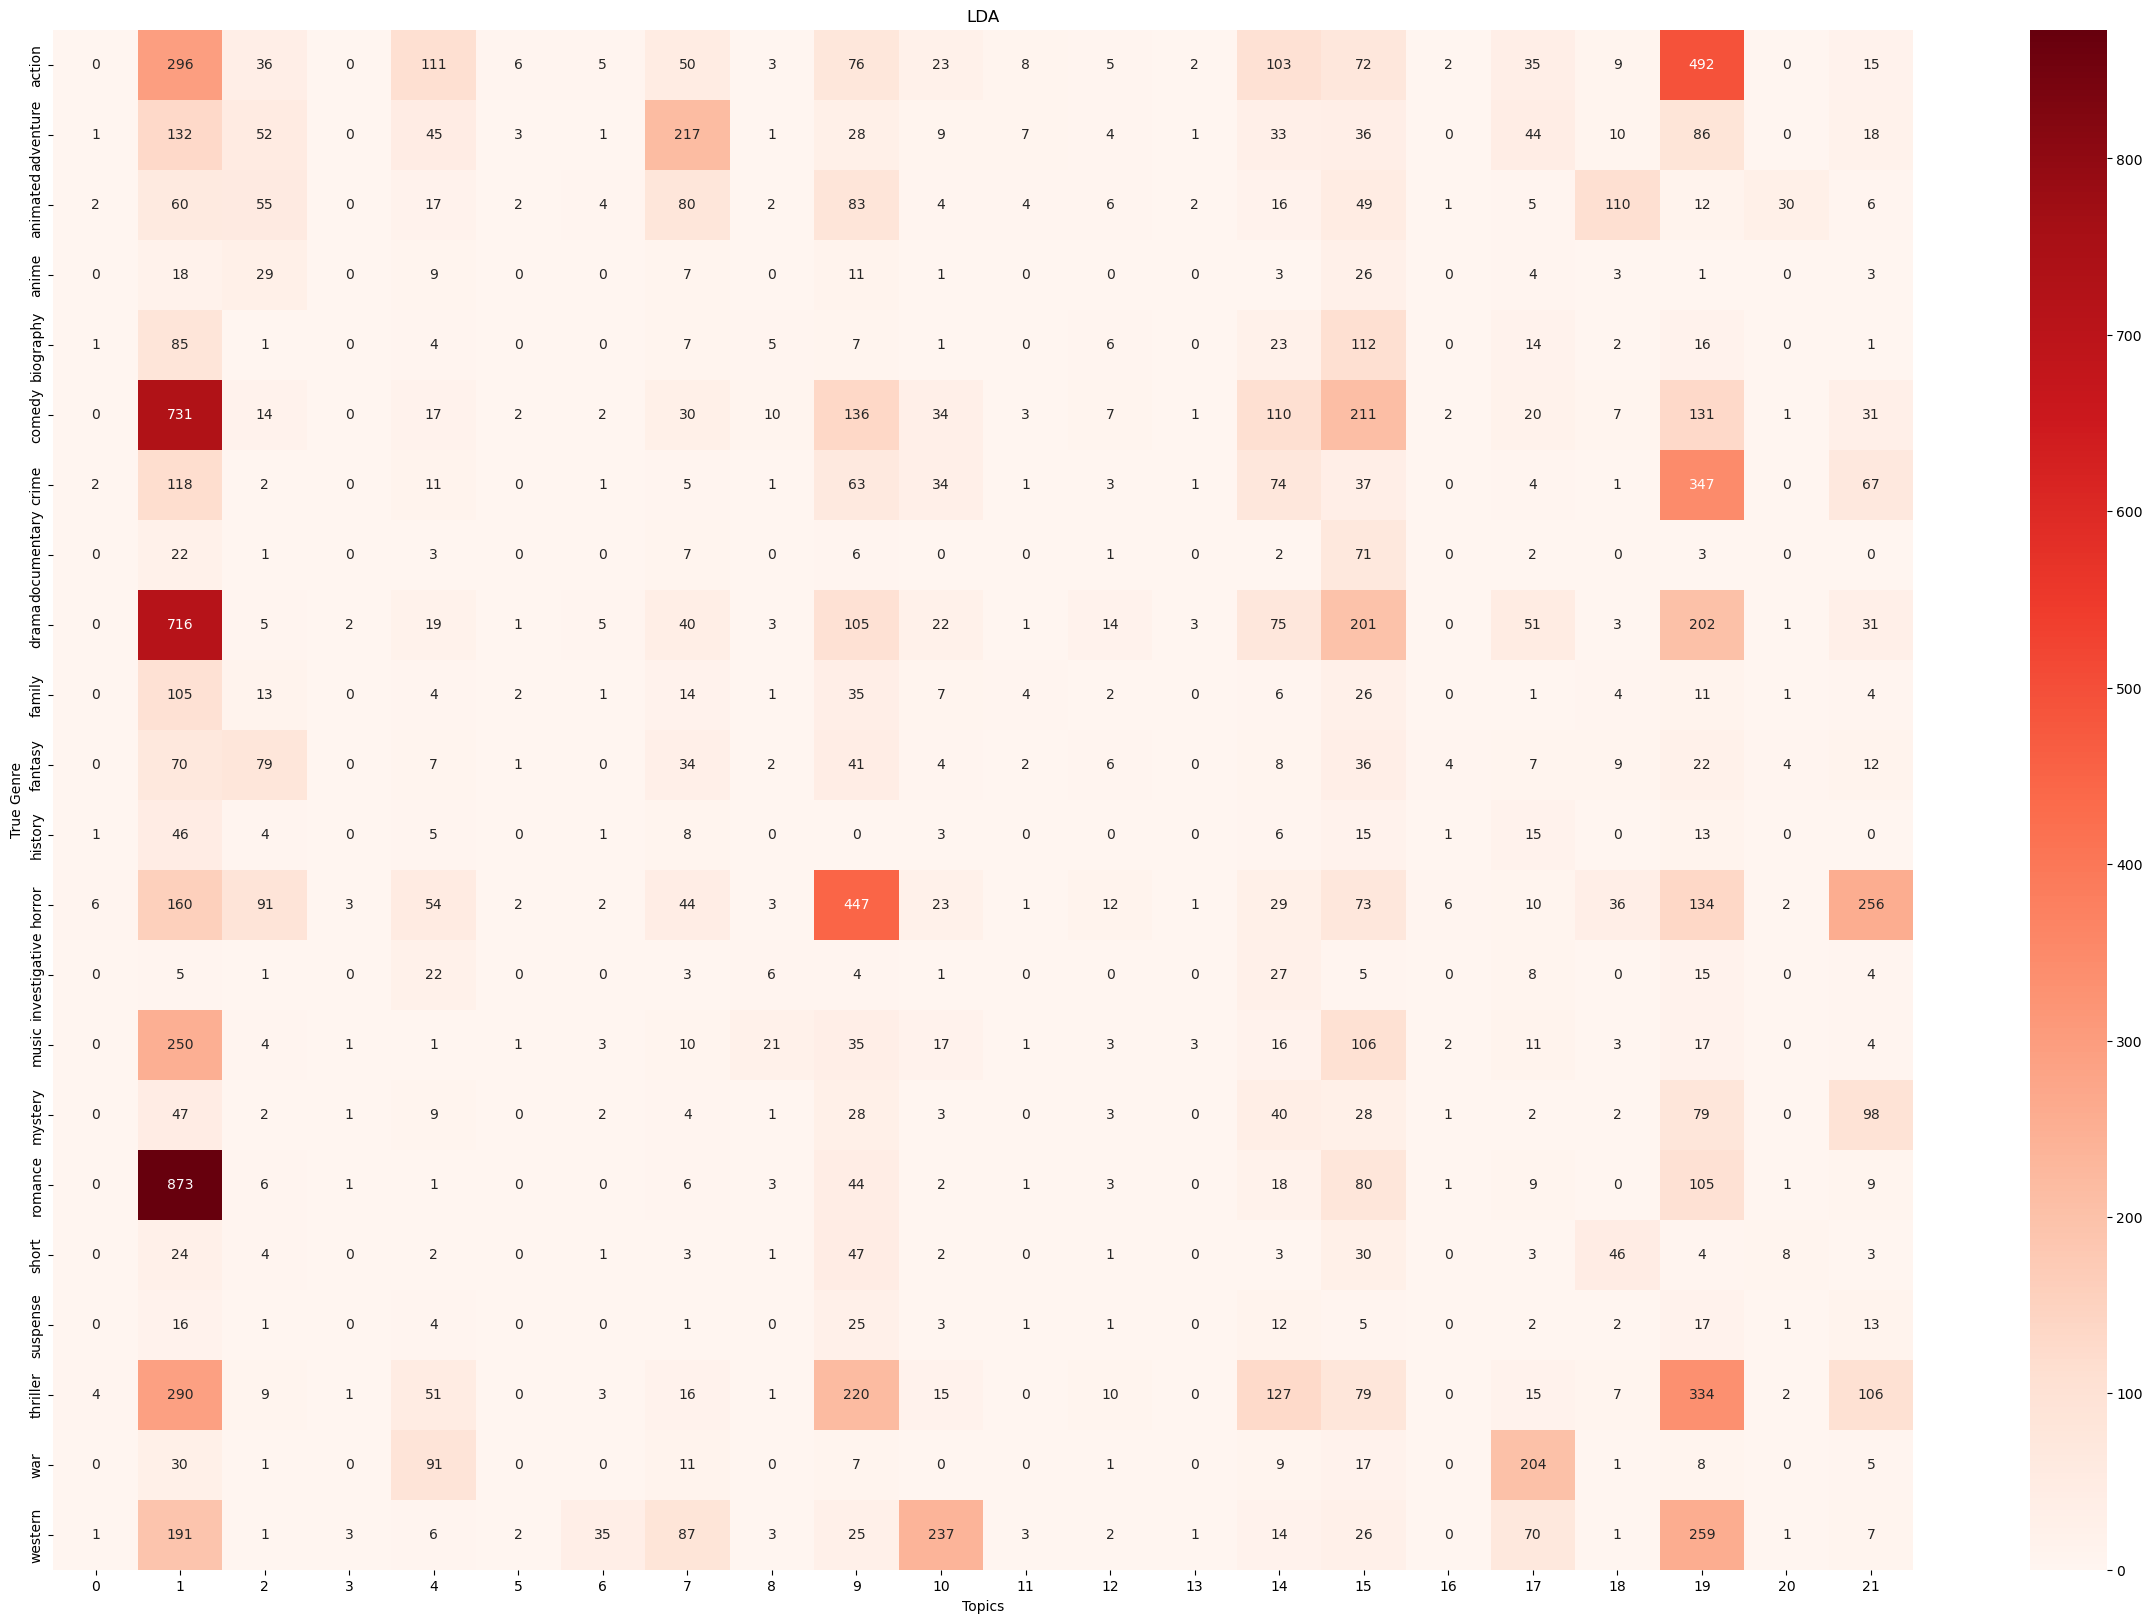

In [74]:
dominant_topics = df_lda['Topics']
genres = df_lda['Genre']

plt.figure(figsize=(30,20))
sns.heatmap(pd.crosstab(genres, dominant_topics), annot=True, fmt='', cmap='Reds' )
plt.title('LDA')
plt.ylabel('True Genre')
plt.show()

We can observe for example that the topic 9 is assigned 447 times to the genre **Horror* 

On the other hand, the most controversial topic is the 1st one since we can observe high values both for **Romance** (873) and for **Drama** (716) and **Comedy** (731). 







Even if the accuracy we get is much higher than a random choice, we are not satisfied since there are some classes for which our model is unable to predict correctly. This could be due to the fact that some classes are similar or under represented. We try BERT architecture to see if we can get to better results

# Transformer Based Approach : BERT

BERT stands for Bidirectional Encoder Representations from Transformers. It's designed to pre-train deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context.

We initialize all parameters from the pre-trained model and fine-tune them.

In [62]:
from tqdm.auto import tqdm
from transformers import BertTokenizer

In [63]:
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1903,The Great Train Robbery,American,Edwin S. Porter,NaN,western,https://en.wikipedia.org/wiki/The_Great_Train_...,film opens two bandits breaking railroad teleg...
1,1906,Dream of a Rarebit Fiend,American,Wallace McCutcheon and Edwin S. Porter,NaN,short,https://en.wikipedia.org/wiki/Dream_of_a_Rareb...,rarebit fiend gorges welsh rarebit restaurant ...
2,1906,From Leadville to Aspen: A Hold-Up in the Rockies,American,Francis J. Marion and Wallace McCutcheon,NaN,western,https://en.wikipedia.org/wiki/From_Leadville_t...,film features train traveling rockies hold cre...
3,1906,Kathleen Mavourneen,American,Edwin S. Porter,NaN,short,https://en.wikipedia.org/wiki/Kathleen_Mavourn...,irish villager kathleen tenant captain clearfi...
4,1907,Daniel Boone,American,Wallace McCutcheon and Ediwin S. Porter,"William Craven, Florence Lawrence",biography,https://en.wikipedia.org/wiki/Daniel_Boone_(19...,boones daughter befriends indian maiden boone ...


In [64]:
df.reset_index(inplace=True)

In [65]:
df['Genre'].unique()

array(['western', 'short', 'biography', 'adventure', 'horror', 'crime',
       'fantasy', 'history', 'mystery', 'romance', 'investigative',
       'animated', 'action', 'documentary', 'war', 'thriller', 'music',
       'suspense', 'family', 'anime', 'comedy', 'drama'], dtype=object)

We split the data into training and testing sets 

In [69]:
from sklearn.model_selection import train_test_split

Y = df['Genre']
X_train, X_test, y_train, y_test = train_test_split(df['Plot'],Y, test_size = 0.2, random_state = 42)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(11262,) (11262,)
(2816,) (2816,)


In [70]:
df.shape

(14078, 4)

In [71]:
test_dataset = pd.DataFrame([y_test, X_test]).transpose().reset_index(drop=True)
test_dataset.head()

,Genre,Plot
0,suspense,brothers dova matt dillon milo gary sinise sma...
1,action,vinaayagam ajith kumar brave person living vil...
2,crime,city god starts road accident story traces lif...
3,crime,john dortmunder redford released latest stint ...
4,drama,orkut oru ormakoot story friendship four boys ...


In [72]:
df = df.drop(test_dataset.index)
df.shape

(11262, 4)

In [73]:
test_dataset = test_dataset.reset_index(drop = True)
test_dataset.head()

,Genre,Plot
0,suspense,brothers dova matt dillon milo gary sinise sma...
1,action,vinaayagam ajith kumar brave person living vil...
2,crime,city god starts road accident story traces lif...
3,crime,john dortmunder redford released latest stint ...
4,drama,orkut oru ormakoot story friendship four boys ...


We initialized the tokenizer with the BertTokenizer function, specifying the pre trained model as BERT base.

In [74]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [75]:
lengths = []
for i in df['Plot']:
    words = i.split()
    lengths.append(len(words))

In [76]:
max_features = np.quantile(lengths, q = 0.75)
max_features=int(max_features)
max_features

365

We defined the tokenizer's parameters to encode the plots

In [82]:
token = tokenizer.encode_plus(
    df['Plot'].iloc[1], 
    max_length=365, 
    truncation=True, 
    padding='max_length', 
    add_special_tokens=True, #[CLS],[PAD],[SEP]
    return_tensors='tf'
)

We can then investigate the input ids:

In [83]:
token.input_ids

<tf.Tensor: shape=(1, 365), dtype=int32, numpy=
array([[  101,  3552,  1294,  1685,  9853,  2712,  1797,   179, 10038,
        25535, 21188,  1197,  1209,  2365,  9100,  2365,  1202,  9685,
         5938,  2016,  1534,  3152, 16358, 15901,  1377,  1831,  1720,
         5515,  2273,  8194,  1116,  1873, 12076,  9540,  1879,  1193,
         1750, 15903, 16736,  2214,  2104, 25338, 15456,  1213,  1583,
         3098,  1243,  3535,  5052,  3677, 22245,  1663,  1177, 10951,
         1116,  8701,  5343, 26059,  1116,  8593,  1137, 27801,  1818,
         6090,  1201,  2789,  2636,  2039,  1685,  1536,  3373,  2027,
        10318, 20122,  1162,  1534, 17933,  2760,  1933,   179, 10038,
         9283,  8468, 15622,  1116,   179, 16463,  1141, 11314, 10571,
         2496, 14778, 10500,  2496, 16793,  3152, 11480,  1116, 21963,
         1543,  2244, 25338, 15456,  2693,  1685,  1590,  1116,  5119,
         2960,  4241,  5923,  4196,  4395,  5218,  4138,  5587,  1839,
         2441,  4501,  6246, 

The **attention mask** is used to indicate which tokens the model should pay attention to and which ones it should ignore. 

In [84]:
token.attention_mask

<tf.Tensor: shape=(1, 365), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

We create arrays for input IDs and attention masks, which are essential for our BERT model, and then proceed to tokenize each plot to generate our training data.

In [86]:
X_input_ids = np.zeros((len(df), 365))
X_attn_masks = np.zeros((len(df), 365))

In [87]:
X_input_ids.shape

(11262, 365)

In [88]:
def generate_training_data(df, ids, masks, tokenizer):
    for i, text in tqdm(enumerate(df['Plot'])):
        tokenized_text = tokenizer.encode_plus(
            text,
            max_length=365, 
            truncation=True, 
            padding='max_length', 
            add_special_tokens=True,
            return_tensors='tf'
        )
        ids[i, :] = tokenized_text.input_ids
        masks[i, :] = tokenized_text.attention_mask
    return ids, masks

In [89]:
X_input_ids, X_attn_masks = generate_training_data(df, X_input_ids, X_attn_masks, tokenizer)

11262it [01:07, 166.96it/s]


Now we have to define also the labels array used as a one hot encoded target vector

In [90]:
labels = np.zeros((len(df), 22))
labels.shape

(11262, 22)

In [91]:
labels[np.arange(len(df)), df['Genre_int'].values] = 1 # one-hot encoded target tensor

The following code defines a function `DatasetMapFunction` that takes in three arguments: `input_ids`, `attn_masks`, and `labels`. The function returns a tuple containing a dictionary and the labels argument.The purpose is to map the input data to a format that can be consumed by the machine learning BERT model. 

In [92]:
dataset = tf.data.Dataset.from_tensor_slices((X_input_ids, X_attn_masks, labels))
dataset.take(1) # one sample data
     

<_TakeDataset element_spec=(TensorSpec(shape=(365,), dtype=tf.float64, name=None), TensorSpec(shape=(365,), dtype=tf.float64, name=None), TensorSpec(shape=(22,), dtype=tf.float64, name=None))>

In [93]:
def DatasetMapFunction(input_ids, attn_masks, labels):
    return {
        'input_ids': input_ids,
        'attention_mask': attn_masks
    }, labels
     

In [94]:
dataset = dataset.map(DatasetMapFunction) # converting to required format for tensorflow dataset 

In [96]:
dataset = dataset.shuffle(10000).batch(16, drop_remainder=True) # batch size = 16

In [97]:
dataset.take(1)

<_TakeDataset element_spec=({'input_ids': TensorSpec(shape=(16, 365), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(16, 365), dtype=tf.float64, name=None)}, TensorSpec(shape=(16, 22), dtype=tf.float64, name=None))>

Then we chose to have only 80% of our dataset as our training dataset and 20% as our validation dataset

In [98]:
p = 0.8
train_size = int((len(df)//16)*p)

In [99]:
train_size

562

In [100]:
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)

## Model Definition and Fine Tuning

Here we define:
* two input layers for input ids and attention masks
* the BERT embeddings layer using the BERT model
* the intermediate layer
* the output layer using softmax as our classification activation function

After defining the optimizer, the loss function and the metrics, we proceeded with the training


In [101]:
with tpu_strategy.scope():
    from transformers import TFBertModel
    model = TFBertModel.from_pretrained('bert-base-cased') 

    input_ids = tf.keras.layers.Input(shape=(365,), name='input_ids', dtype='int32')
    attn_masks = tf.keras.layers.Input(shape=(365,), name='attention_mask', dtype='int32')

    bert_embds = model.bert(input_ids, attention_mask=attn_masks)[1] 
    intermediate_layer = tf.keras.layers.Dense(512, activation='relu', name='intermediate_layer')(bert_embds)
    output_layer = tf.keras.layers.Dense(22, activation='softmax', name='output_layer')(intermediate_layer) 

    movie_model = tf.keras.Model(inputs=[input_ids, attn_masks], outputs=output_layer)
    
    optim = tf.keras.optimizers.legacy.Adam(learning_rate=1e-5, decay=1e-6)
    loss_func = tf.keras.losses.CategoricalCrossentropy()
    acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

    movie_model.compile(optimizer=optim, loss=loss_func, metrics=[acc])

hist = movie_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/10


2023-10-22 23:57:40.873444: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/Adam/AssignAddVariableOp.
2023-10-22 23:57:41.542284: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/Adam/AssignAddVariableOp.


562/562 [==============================] - ETA: 0s - loss: 2.2904 - accuracy: 0.3045

2023-10-22 23:59:04.627739: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-10-22 23:59:04.746434: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


562/562 [==============================] - 119s 78ms/step - loss: 2.2904 - accuracy: 0.3045 - val_loss: 1.8093 - val_accuracy: 0.4441
Epoch 2/10
562/562 [==============================] - 37s 65ms/step - loss: 1.7131 - accuracy: 0.4673 - val_loss: 1.6057 - val_accuracy: 0.4902
Epoch 3/10
562/562 [==============================] - 37s 66ms/step - loss: 1.4952 - accuracy: 0.5301 - val_loss: 1.3345 - val_accuracy: 0.5811
Epoch 4/10
562/562 [==============================] - 37s 66ms/step - loss: 1.3086 - accuracy: 0.5855 - val_loss: 1.0397 - val_accuracy: 0.6822
Epoch 5/10
562/562 [==============================] - 38s 67ms/step - loss: 1.1268 - accuracy: 0.6433 - val_loss: 0.8399 - val_accuracy: 0.7531
Epoch 6/10
562/562 [==============================] - 37s 65ms/step - loss: 0.9434 - accuracy: 0.7034 - val_loss: 0.6891 - val_accuracy: 0.7930
Epoch 7/10
562/562 [==============================] - 37s 66ms/step - loss: 0.7867 - accuracy: 0.7595 - val_loss: 0.5080 - val_accuracy: 0.8586
Ep

The accuracy reached on the validation set at the end of the 10th epoch is around 95%

In [102]:
movie_model.save('movie_model')

INFO:tensorflow:Assets written to: movie_model/assets


INFO:tensorflow:Assets written to: movie_model/assets


# Prediction on Test dataset and Confusion Matrix

We loaded the model and prepared the test dataset

In [103]:
movie_model = tf.keras.models.load_model('movie_model')

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

def prepare_data(input_text, tokenizer):
    token = tokenizer.encode_plus(
        input_text,
        max_length=365, 
        truncation=True, 
        padding='max_length', 
        add_special_tokens=True,
        return_tensors='tf'
    )
    return {
        'input_ids': tf.cast(token.input_ids, tf.float64),
        'attention_mask': tf.cast(token.attention_mask, tf.float64)
    }

def make_prediction(model, processed_data, classes=['western', 'short', 'biography', 'adventure', 'horror', 'crime',
       'fantasy', 'history', 'mystery', 'romance', 'investigative',
       'animated', 'action', 'documentary', 'war', 'thriller', 'music',
       'suspense', 'family', 'anime', 'comedy', 'drama']):
    probs = model.predict(processed_data)[0]
    return classes[np.argmax(probs)]

In [104]:
test_dataset['Predicted Genre'] = 'None'
with tpu_strategy.scope():
    for i in range(test_dataset.shape[0]):
        processed_data = prepare_data(test_dataset['Plot'].iloc[i], tokenizer)
        test_dataset['Predicted Genre'].iloc[i] = make_prediction(movie_model, processed_data=processed_data)

2023-10-23 00:08:02.125151: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-10-23 00:08:02.569389: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


1/1 [==============================] - 1s 912ms/step


We visualized the results using the confusion matrix

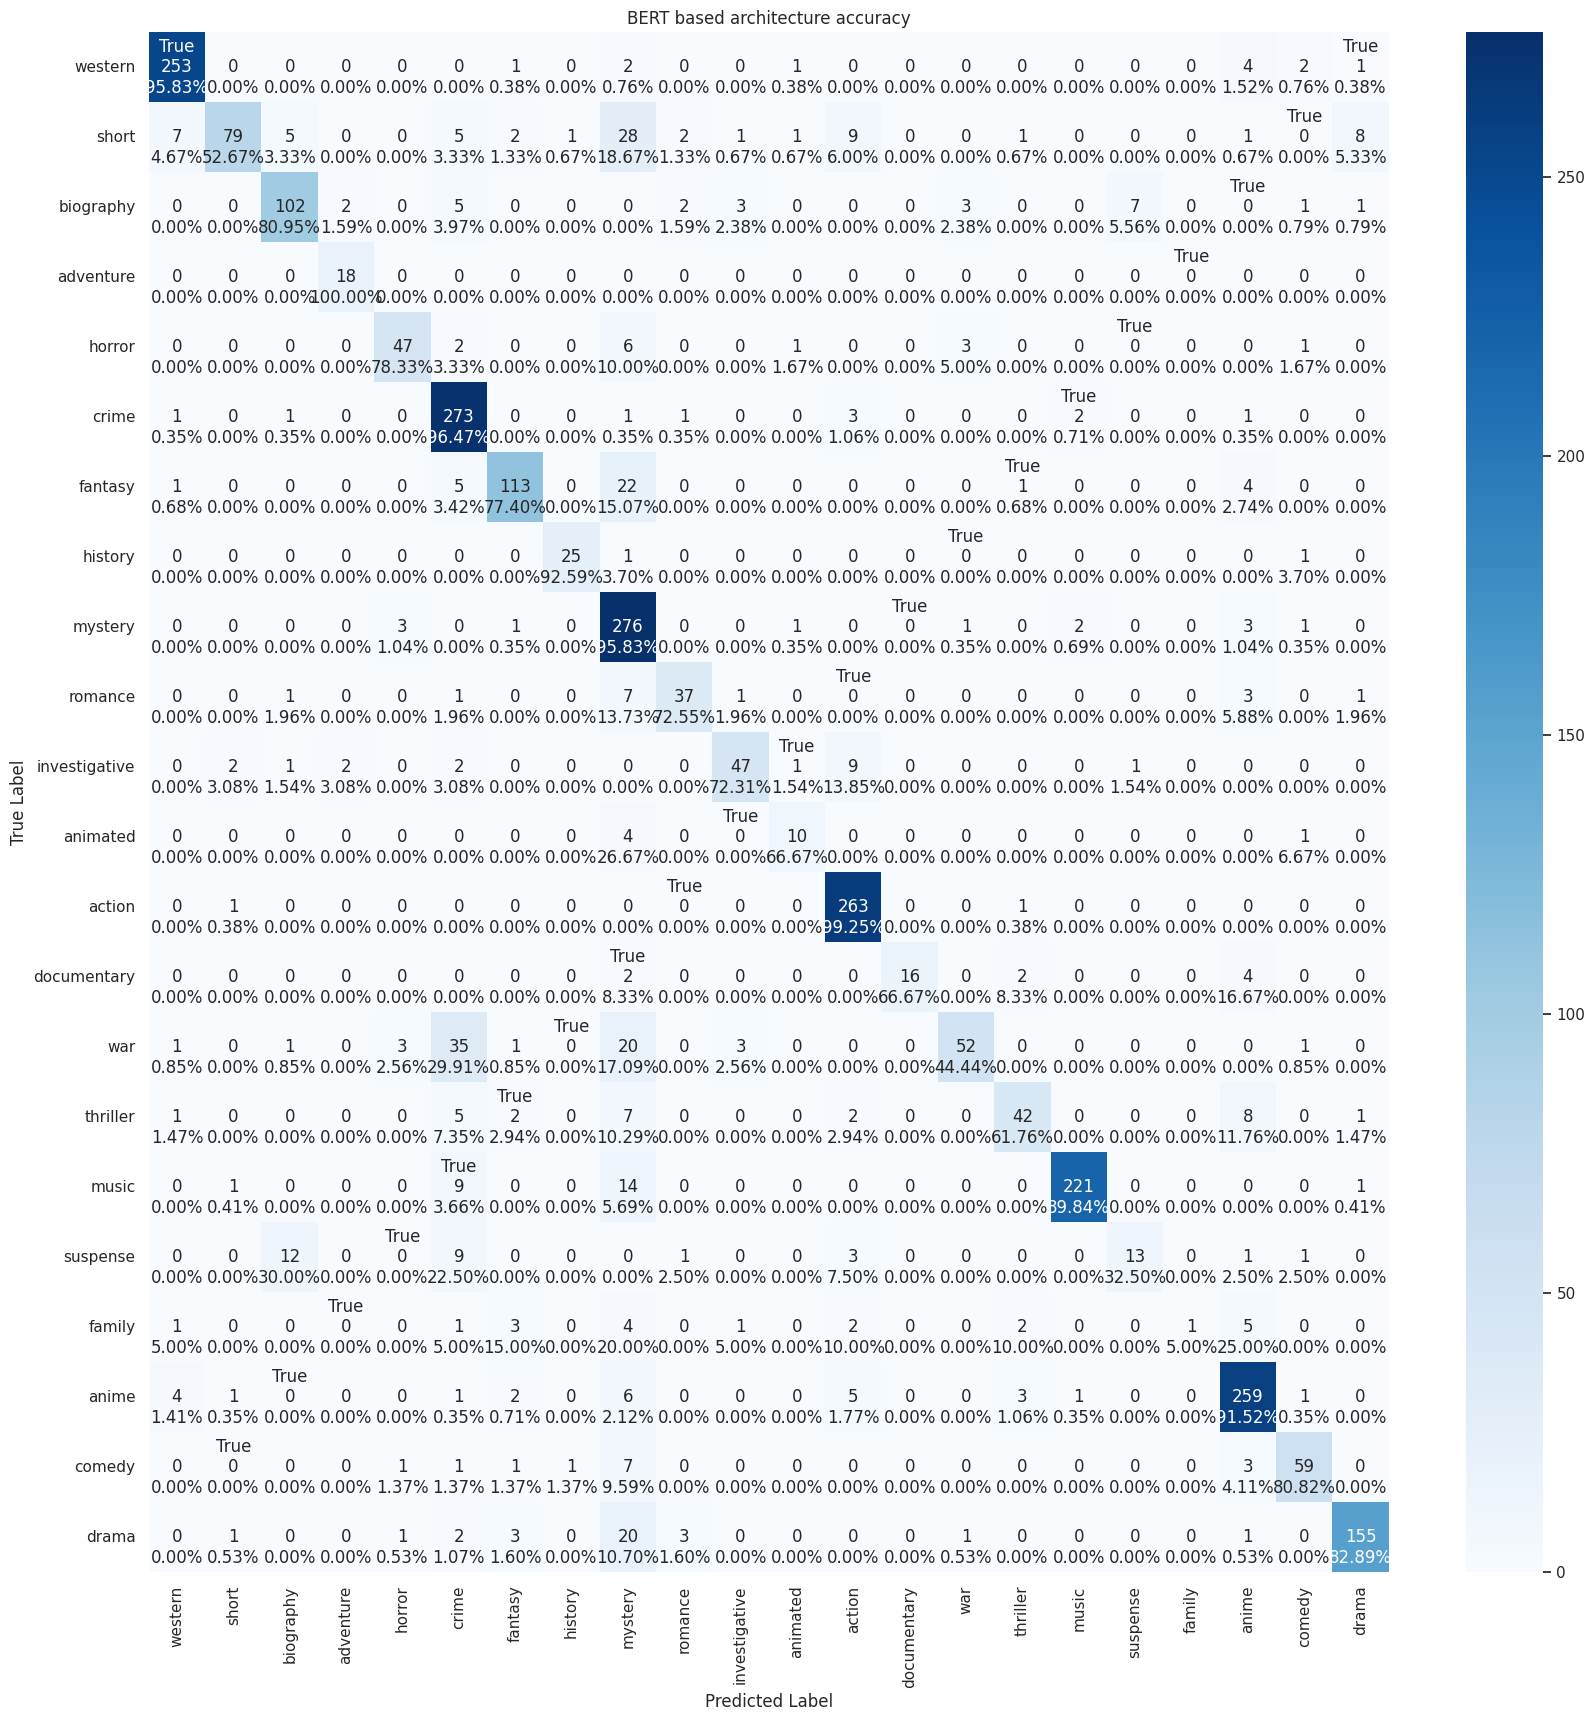

In [108]:
import seaborn as sns
#Confusion matrix to visualize results
from sklearn.metrics import confusion_matrix

y_test_classes = test_dataset['Genre']
predictions_classes = test_dataset['Predicted Genre']

cf_matrix_BERT = confusion_matrix(y_test_classes, predictions_classes)
TF_labels = ['']*len(cf_matrix_BERT)*len(cf_matrix_BERT)
for i in range(len(cf_matrix_BERT)):
    TF_labels[i*20 + i] = 'True'

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_BERT.flatten()] 
cmn = cf_matrix_BERT.astype('float') / cf_matrix_BERT.sum(axis=1)[:, np.newaxis]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmn.flatten()] 

labels2=['western', 'short', 'biography', 'adventure', 'horror', 'crime',
       'fantasy', 'history', 'mystery', 'romance', 'investigative',
       'animated', 'action', 'documentary', 'war', 'thriller', 'music',
       'suspense', 'family', 'anime', 'comedy', 'drama']

labels = [f"{l}\n{gc}\n{gp}" for l, gc, gp in
          zip(TF_labels, group_counts,group_percentages)] 
labels = np.asarray(labels).reshape(22,22)
plt.figure(figsize = (20,20))
sns.set(font_scale=1)


sns.heatmap(cf_matrix_BERT, annot=labels, fmt='', cmap='Blues', xticklabels=labels2, yticklabels=labels2) 
plt.title('BERT based architecture accuracy')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

We can see that we got really good results 

In [109]:
#classification report
from sklearn import metrics
print(metrics.classification_report(y_test_classes, predictions_classes,target_names=labels2))

               precision    recall  f1-score   support

      western       0.94      0.96      0.95       264
        short       0.93      0.53      0.67       150
    biography       0.83      0.81      0.82       126
    adventure       0.82      1.00      0.90        18
       horror       0.85      0.78      0.82        60
        crime       0.77      0.96      0.85       283
      fantasy       0.88      0.77      0.82       146
      history       0.93      0.93      0.93        27
      mystery       0.65      0.96      0.77       288
      romance       0.80      0.73      0.76        51
investigative       0.84      0.72      0.78        65
     animated       0.67      0.67      0.67        15
       action       0.89      0.99      0.94       265
  documentary       1.00      0.67      0.80        24
          war       0.87      0.44      0.59       117
     thriller       0.81      0.62      0.70        68
        music       0.98      0.90      0.94       246
     susp